In [1]:
%matplotlib inline
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from  tqdm import tqdm
import plotly.graph_objects as go


In [2]:
import sys
sys.path.append("/home/egorcaa/учеба/QST/AAKat/libs")

In [3]:
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)


In [4]:
%load_ext autoreload
%autoreload 2

import qe_BS_DOS
import wannier_loader 

In [5]:
Ang2Bohr = 1.8897259886
Bohr2Ang = 1./Ang2Bohr


# QE

In [57]:
calc = qe_BS_DOS.qe_analyse_spinpolarized('./', 'CrTe2')

efermi -1.02
Unit Cell Volume:   238.4013  (Ang^3)
alat 3.7100
Reciprocal-Space Vectors cart (Ang^-1)
[[ 1.6935808234  0.9777893443 -0.          ]
 [ 0.            1.9555786886  0.          ]
 [ 0.           -0.            0.3141592427]]
Reciprocal-Space Vectors cart (2 pi / alat)
[[ 1.            0.5773502692 -0.          ]
 [ 0.            1.1547005384  0.          ]
 [ 0.           -0.            0.1855      ]]
Real-Space Vectors cart (Ang)
[[ 3.7100002671  0.            0.          ]
 [-1.8550001335  3.2129544793  0.          ]
 [ 0.            0.           20.0000014396]]
Real-Space Vectors cart (alat)
[[ 1.            0.            0.          ]
 [-0.5           0.8660254038  0.          ]
 [ 0.            0.            5.3908355795]]


 positions cart (alat)
['Cr', 'Te', 'Te']
[[0.           0.           2.6954177898]
 [0.           0.5773502115 2.2810301887]
 [0.50000005   0.2886751057 3.1098053908]]
positions (frac or crystal)
[[0.        0.        0.5      ]
 [0.3333333 0.666

In [58]:
_,_ = calc.get_qe_kpathBS(filename="kpath_qe2.txt", saveQ=False, points_per_unit=10)

K -0.33333333 0.66666667 0.00000000 0.00000000
. -0.27777778 0.55555556 0.00000000 0.11111111
. -0.22222222 0.44444444 0.00000000 0.22222222
. -0.16666667 0.33333333 0.00000000 0.33333333
. -0.11111111 0.22222222 0.00000000 0.44444444
. -0.05555556 0.11111111 0.00000000 0.55555556
G 0.00000000 0.00000000 0.00000000 0.66666667
. 0.00000000 0.10000000 0.00000000 0.78213672
. 0.00000000 0.20000000 0.00000000 0.89760677
. 0.00000000 0.30000000 0.00000000 1.01307683
. 0.00000000 0.40000000 0.00000000 1.12854688
M 0.00000000 0.50000000 0.00000000 1.24401694
. -0.11111111 0.55555556 0.00000000 1.35512805
. -0.22222222 0.61111111 0.00000000 1.46623916
K -0.33333333 0.66666667 0.00000000 1.57735027


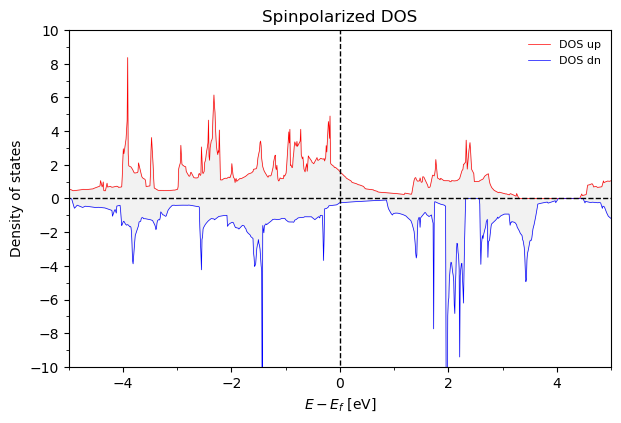

In [60]:
calc.plot_FullDOS()

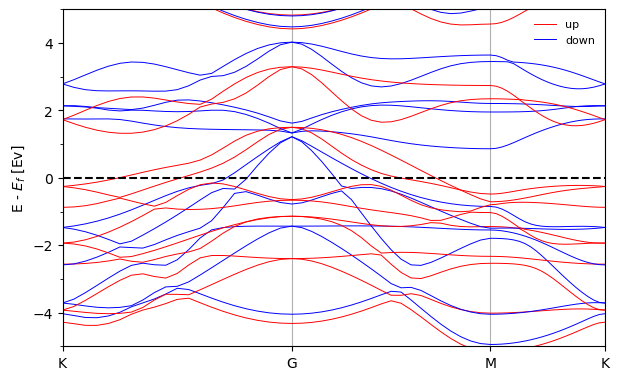

In [61]:
calc.plot_BS(efrom=-5, eto=5)

In [62]:
calc.print_bands_range(7, 20)

efermi -1.02
-------------SPIN UP---------------
band 8 eV from  -5.05 to  -3.42                 eV-eF from  -4.03 to  -2.40
band 9 eV from  -4.95 to  -3.27                 eV-eF from  -3.93 to  -2.25
band 10 eV from  -3.58 to  -2.16                 eV-eF from  -2.56 to  -1.14
band 11 eV from  -3.38 to  -2.16                 eV-eF from  -2.36 to  -1.14
band 12 eV from  -2.96 to  -1.68                 eV-eF from  -1.94 to  -0.66
band 13 eV from  -2.03 to  -1.17                 eV-eF from  -1.01 to  -0.15
band 14 eV from  -1.73 to  0.48                 eV-eF from  -0.71 to  1.50
band 15 eV from  -1.50 to  0.48                 eV-eF from  -0.48 to  1.50
band 16 eV from  0.30 to  2.28                 eV-eF from  1.32 to  3.30
band 17 eV from  0.71 to  2.28                 eV-eF from  1.73 to  3.30
band 18 eV from  3.40 to  4.72                 eV-eF from  4.42 to  5.74
band 19 eV from  3.81 to  5.79                 eV-eF from  4.83 to  6.81
band 20 eV from  4.26 to  6.40                 eV

In [63]:
calc.get_pDOS()

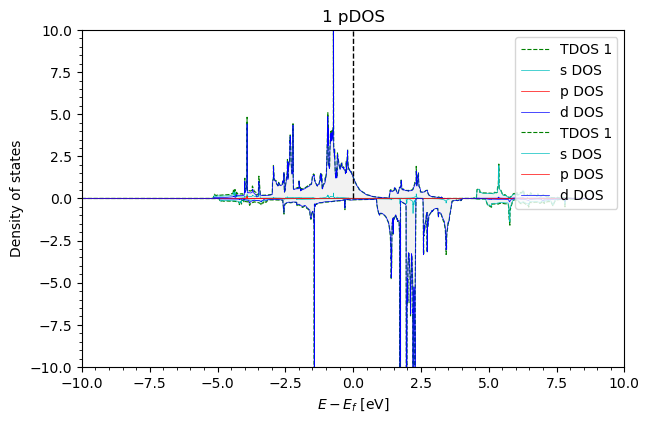

In [64]:
calc.plot_pDOS('1', efrom=-10, eto=10, yfrom=-10)

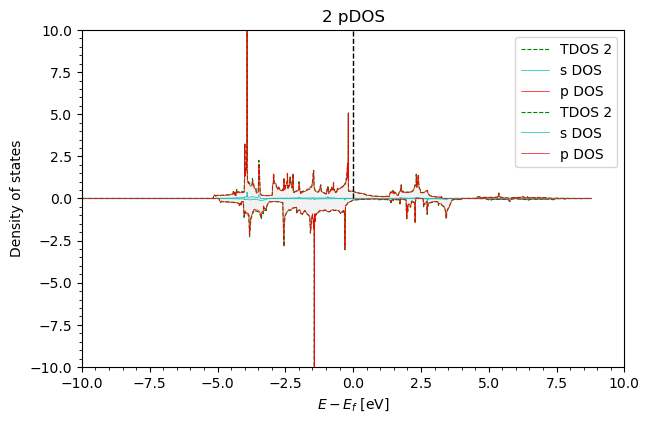

In [65]:
calc.plot_pDOS('2', efrom=-10, eto=10, yfrom=-10)

# Wannier bands

In [101]:
calc.load_wannier(kpath_filename='kpath_qe2.dat')

nwa  11
Rpts 403
we have 2D hamiltonian
nwa  11
Rpts 403
we have 2D hamiltonian


100%|██████████| 16/16 [00:00<00:00, 379.81it/s]


(16, 11)


100%|██████████| 16/16 [00:00<00:00, 399.66it/s]

(16, 11)


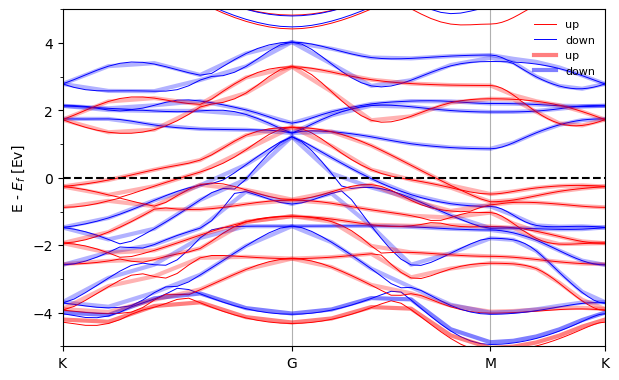

In [99]:
calc.plot_wannier_BS(efrom=-5, eto=5)

In [79]:
loader = wannier_loader.Wannier_loader_FM('./', 'CrTe2')
acell = np.linalg.norm(calc.acell[0])
b1 = calc.bcell[0][:2] / (2. * np.pi / acell)  # First reciprocal lattice vector
b2 = calc.bcell[1][:2] / (2. * np.pi / acell) # Second reciprocal lattice vector



nwa  11
Rpts 403
we have 2D hamiltonian
nwa  11
Rpts 403
we have 2D hamiltonian
hhhh (403, 2)


In [89]:
klim = 1.0 
nkpt = 20

bs, _ = loader.get_dense_hk_symmetric(nkpt=nkpt, krange=klim, find_eigsQ=True)

band_str_up = bs[:,:,0]
# band_str_dn = bs[:,:,1]

100%|██████████| 1600/1600 [00:04<00:00, 383.22it/s]


In [90]:

# k crystal
kpoints_adj_serial = np.mgrid[-klim:klim:1.0/nkpt, -klim:klim:1.0/nkpt].reshape(2,-1).T
x = kpoints_adj_serial[:, 0] 
y = kpoints_adj_serial[:, 1] 


# k cart (2 pi / alat)
coords = [ x[i]  * b1 + y[i]* b2 for i in range(len(x))] # repr cart in 2 pi / alat
coords = np.array(coords)
kx = coords[:, 0] 
ky = coords[:, 1] 




In [96]:
z = np.real(band_str_up[ 7, :] - calc.efermi) # 8th band

fig = go.Figure()
fig.add_trace(go.Contour(x=kx,y=ky,z=z,line_smoothing=1.3))

contour_trace = go.Contour(
    z=z,
    x=kx,
    y=ky,
    contours=dict(
        start=0,
        end=0,
        size=0.1,
        coloring='lines'
    ),
    showscale=False,
    line=dict(width=2)
)
fig.add_trace(contour_trace)

# Create the figure


# Hexagonal Brillouin Zone vertices
BZ_vertices = np.array([
    0.666 * b1 - 0.333 * b2, 
    0.333 * b1 + 0.333 * b2, 
    -0.333 * b1 + 0.666 * b2, 
    -0.666 * b1 + 0.333 * b2, 
    -0.333 * b1 - 0.333 * b2, 
    0.333 * b1 - 0.666 * b2,
    0.666 * b1 - 0.333 * b2])

# High-symmetry points in units of (2π/a)
Gamma = np.array([0, 0])
M = 0.5 * b2
K = -0.3333333333 * b1 + 0.6666666667 * b2


# Add arrows for b1 and b2
fig.add_annotation(
    x=b1[0], y=b1[1],
    ax=0, ay=0,
    xref="x", yref="y",
    axref="x", ayref="y",
    showarrow=True,
    arrowhead=3,
    arrowsize=2,
    arrowwidth=2,
    arrowcolor="green",
    text="b1",
    font=dict(size=12, color="green"),
    yshift=0
)

fig.add_annotation(
    x=b2[0], y=b2[1],
    ax=0, ay=0,
    xref="x", yref="y",
    axref="x", ayref="y",
    showarrow=True,
    arrowhead=3,
    arrowsize=2,
    arrowwidth=2,
    arrowcolor="purple",
    text="b2",
    font=dict(size=12, color="purple"),
    yshift=0
)

# Path: Γ → M → K → Γ
path = np.array([Gamma, M, K, Gamma])

# Plot high-symmetry points
high_symmetry_labels = ['Γ', 'M', 'K']
high_symmetry_points = [Gamma, M, K]
for point, label in zip(high_symmetry_points, high_symmetry_labels):
    fig.add_trace(go.Scatter(
        x=[point[0]], 
        y=[point[1]], 
        mode='markers+text',
        text=[label],
        textposition="top center",
        marker=dict(color='red', size=10),
        name=label,
        showlegend=False
    ))
    
# Plot path
fig.add_trace(go.Scatter(
    x=path[:, 0], 
    y=path[:, 1], 
    mode='lines+markers', 
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(color='red', size=6),
    name='Path: Γ → M → K → Γ',
    showlegend=False
))


# Plot BZ
fig.add_trace(go.Scatter(
    x=BZ_vertices[:, 0], 
    y=BZ_vertices[:, 1], 
    mode='lines', 
    line=dict(color='black', width=2),
    showlegend=False
))



fig.update_layout(
    autosize=False,
    width=800,  # Width of the figure
    height=800,  # Height of the figure
    xaxis=dict(
        scaleanchor="y",  # Match the scale of the x-axis with the y-axis
        title="kx cart in 2 pi / alat",
        range=[-1, 1]
    ),
    yaxis=dict(title="ky cart in 2 pi / alat", range=[-1, 1]),
    title="band str a.u. in CrTe2"
)
fig.show()